# Analysis

1)  
2)  
3)  

In [229]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [230]:
# Import two CSV Files
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [231]:
# Preview city_data_df
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [232]:
# Preview ride_data_df
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [233]:
total_rides = ride_data_df["city"].value_counts()
total_rides_df = pd.DataFrame({'city':total_rides.index, 'ride_count':total_rides.values})
sorted_total_rides_df = total_rides_df.sort_index(by=['city'], ascending=[True])
total_rides_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


,city,ride_count
0,Port Johnstad,34
1,Swansonbury,34
2,South Louis,32
3,Port James,32
4,West Peter,31


In [234]:
piechart_data = pd.merge(ride_data_df, city_data_df, on='city')
piechart_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [235]:
fare = ride_data_df.groupby("city").mean()
del fare['ride_id']
fare = fare.reset_index()
fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [236]:
ride_share_data = pd.merge(total_rides_df, city_data_df, on='city')
ride_share_data.head()

,city,ride_count,driver_count,type
0,Port Johnstad,34,22,Urban
1,Swansonbury,34,64,Urban
2,South Louis,32,12,Urban
3,Port James,32,15,Suburban
4,Port James,32,3,Suburban


In [237]:
final_ride_share_data = pd.merge(ride_share_data, fare)
final_ride_share_data.head()

,city,ride_count,driver_count,type,fare
0,Port Johnstad,34,22,Urban,25.882941
1,Swansonbury,34,64,Urban,27.464706
2,South Louis,32,12,Urban,27.087500
3,Port James,32,15,Suburban,31.806562
4,Port James,32,3,Suburban,31.806562


# Bubble Plot of Ride Sharing Data

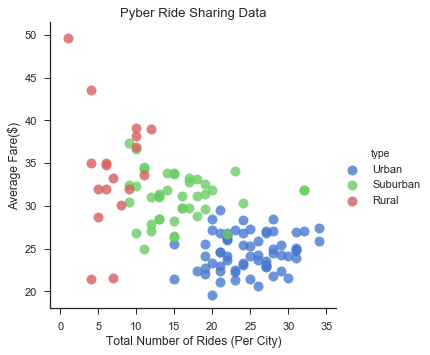

In [251]:
# Scatterplot Style
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Scatterplot Dataframe
sns.lmplot('ride_count',
          'fare',
          data=final_ride_share_data,
          fit_reg=False,
          hue="type",
          scatter_kws={"marker": "o",
                        "s": 100})
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data")
plt.show()

# Total Fares by City Type

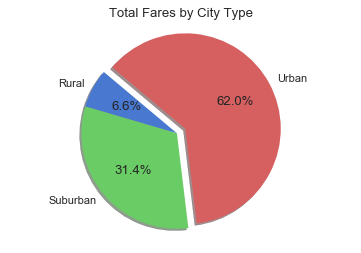

In [248]:
# Pie Chart of Total Fares by City Type
city_type_total_fares = piechart_data.groupby("type").sum()
del city_type_total_fares['ride_id']
del city_type_total_fares['driver_count']
titles = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
plt.pie(city_type_total_fares, explode=explode, labels=titles, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Total Fares by City Type")
plt.show()

# Total Rides by City Type

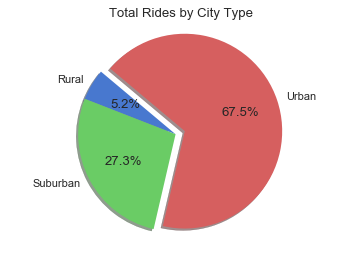

In [249]:
# Pie Chart of Total Rides by City Type
total_ride_piechart = piechart_data.groupby("type").count()
del total_ride_piechart['date']
del total_ride_piechart['fare']
del total_ride_piechart['ride_id']
del total_ride_piechart['driver_count']
titles = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
plt.pie(total_ride_piechart, explode=explode, labels=titles, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Total Rides by City Type")
plt.show()

# Total Drivers by City Type

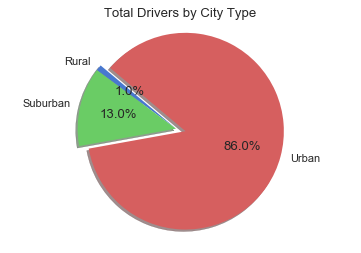

In [250]:
# Pie Chart of Total Drivers by City Type
# Pie Chart of Total Rides by City Type
total_drivers_piechart = piechart_data.groupby("type").sum()
del total_drivers_piechart['fare']
del total_drivers_piechart['ride_id']
titles = ["Rural", "Suburban", "Urban"]
explode = [0,0,0.1]
plt.pie(total_drivers_piechart, explode=explode, labels=titles, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Total Drivers by City Type")
plt.show()